In [2]:
import pandas as pd
import numpy as np


In [3]:
df_data = pd.read_csv("scaled_data.csv")
df_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,Var,EMA5,EMA12,EMA26,MACD,Signal,Short_Gain,Long_Gain
0,2011-08-18,0.013846,0.021253,0.006671,0.009255,0.998065,0.0,0,0.615385,0.75,0.547045,0.014992,0.002356,0.001217,0.000619,0.717638,0.716671,0.056152,0.111827
1,2011-08-19,0.005679,0.012416,0.004617,0.004940,0.826534,0.0,0,0.615385,1.00,0.547045,0.014992,0.000900,0.000540,0.000289,0.713814,0.715758,0.046254,0.119576
2,2011-08-22,0.010778,0.010916,0.004410,0.005148,0.516206,0.0,0,0.634615,0.00,0.465403,0.014992,0.000000,0.000000,0.000000,0.711045,0.714367,0.037789,0.124211
3,2011-08-23,0.006117,0.014008,0.004802,0.013708,0.629742,0.0,0,0.634615,0.25,0.551041,0.014992,0.002288,0.000886,0.000386,0.716538,0.714566,0.033064,0.071126
4,2011-08-24,0.013131,0.017861,0.012508,0.017492,0.459037,0.0,0,0.634615,0.50,0.711575,0.010164,0.005090,0.002229,0.001032,0.724208,0.716555,0.008130,0.039480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2021-08-11,0.991156,0.991324,0.987787,0.991043,0.048141,0.0,0,0.596154,0.50,0.553264,0.001560,0.992366,0.993243,0.993566,0.827174,0.846570,0.006539,0.038505
2512,2021-08-12,0.990594,0.995199,0.987899,0.994778,0.037759,0.0,0,0.596154,0.75,0.559468,0.003951,0.994905,0.995225,0.995284,0.830260,0.847467,0.006539,0.038505
2513,2021-08-13,0.996125,0.997108,0.994665,0.997052,0.038729,0.0,0,0.596154,1.00,0.562028,0.006821,0.997365,0.997259,0.997048,0.833409,0.848937,0.006539,0.038505
2514,2021-08-16,0.993149,1.000393,0.988488,1.000000,0.108318,0.0,0,0.615385,0.00,0.556143,0.007743,1.000000,0.999443,0.998907,0.837171,0.851010,0.006539,0.038505


In [6]:
def xy_priceinputs(df, x_len=60):
    prices = df.Close
    X = []
    y = []
    for i in range(len(prices) - x_len):
        X.append(prices[i:i+x_len])
        y.append(prices[i])

    return np.array(X), np.array(y)

X,y = xy_priceinputs(df_data)
print(X.shape, y.shape)

X = X.reshape(X.shape[0],X.shape[1] , 1)
# y = y.reshape(y.shape[0],y.shape[1] , 1)
print(X.shape, y.shape)

(2456, 60) (2456,)
(2456, 60, 1) (2456,)


In [7]:
from keras.models import load_model
single_model = load_model("Singleout_model.h5")

In [8]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

y_pred_single = single_model.predict(X)
print(y_pred_single[:5])

[[0.04040268]
 [0.04035768]
 [0.04045384]
 [0.04071844]
 [0.04058792]]


In [20]:
X_lst = X[-1:] #Latest item
print(X_lst.shape)
pred_lst = []
# for i in range(5):

next_day_pred = single_model.predict(X_lst)
X_lst = X_lst[:,1:]
print(X_lst)
print(next_day_pred)

(1, 60, 1)
[[[0.91810875]
  [0.91550611]
  [0.9178289 ]
  [0.91844454]
  [0.92054345]
  [0.91950805]
  [0.92135496]
  [0.91698929]
  [0.92770771]
  [0.92656032]
  [0.92681215]
  [0.92504903]
  [0.93053416]
  [0.93249314]
  [0.93515173]
  [0.93296894]
  [0.92633634]
  [0.9259446 ]
  [0.91001387]
  [0.92669142]
  [0.9330087 ]
  [0.93157684]
  [0.93859604]
  [0.94283558]
  [0.94525023]
  [0.94589603]
  [0.94690675]
  [0.95356094]
  [0.96279823]
  [0.96058014]
  [0.96487589]
  [0.95493676]
  [0.96785202]
  [0.972232  ]
  [0.96804858]
  [0.96987356]
  [0.96569014]
  [0.95611594]
  [0.93823103]
  [0.95532979]
  [0.96512857]
  [0.96768357]
  [0.98026201]
  [0.98329427]
  [0.97765089]
  [0.97714544]
  [0.98225544]
  [0.97624705]
  [0.97366394]
  [0.98365928]
  [0.97756666]
  [0.98537201]
  [0.98742156]
  [0.98641084]
  [0.98795503]
  [0.99104349]
  [0.99477767]
  [0.99705197]
  [1.        ]]]
[[0.99135137]]


In [106]:
X_lst = X[-1].reshape(1,-1,1)
print(X_lst.shape)
pred_lst = []
# for i in range(5):

next_day_pred = single_model.predict(X_lst)
X_lst = X_lst[:,1:]
print(X_lst.shape)
print(next_day_pred)

(1, 60, 1)
(1, 59, 1)
[[0.9676505]]


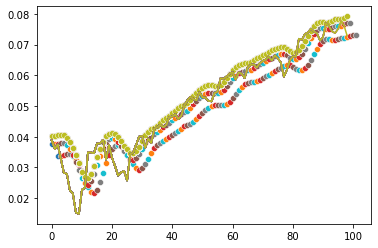

In [69]:
for i in range(100):
    # print(y_pred_train[i], y_train[i][:,0])

    sns.lineplot(x=np.arange(0,i), y= y[:i,0,0])
    sns.scatterplot(x=[i,i+len(y_pred_dual[i])], y= y_pred_dual[i])
    sns.scatterplot(x=np.arange(0,i), y= y_pred_single[:i,0])

In [70]:
df_data = df_data.drop(index=np.arange(0,70)).reset_index(drop=True)
# df_data[['LSTM_pred1', 'LSTM_pred10']] = y_pred_dual
df_data[['LSTM_single']] = y_pred_single
df_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Week,Day,PrevDayChng,Var,EMA5,EMA12,EMA26,MACD,Signal,Short_Gain,Long_Gain,LSTM_single
0,2011-11-28,0.022287,0.023772,0.020618,0.022682,0.385738,0.0,0,0.903846,0.00,0.537608,0.005258,0.014113,0.017556,0.019515,0.692043,0.718347,0.037591,0.151102,0.040403
1,2011-11-29,0.023470,0.025673,0.022450,0.023470,0.362554,0.0,0,0.903846,0.25,0.691860,0.005802,0.014991,0.017272,0.019201,0.692337,0.711974,0.024989,0.149770,0.040358
2,2011-11-30,0.031448,0.035460,0.023354,0.034927,0.616175,0.0,0,0.903846,0.50,0.561245,0.022469,0.019442,0.018829,0.019785,0.703009,0.709422,-0.026002,0.107548,0.040454
3,2011-12-01,0.034602,0.036435,0.033628,0.034881,0.317406,0.0,0,0.903846,0.75,0.752765,0.025501,0.022393,0.020140,0.020323,0.711497,0.709406,-0.022325,0.103377,0.040718
4,2011-12-02,0.037548,0.038429,0.034440,0.034626,0.406854,0.0,0,0.903846,1.00,0.546246,0.014086,0.024275,0.021208,0.020801,0.717991,0.710944,-0.020013,0.110072,0.040588
